# Machine Learning Aula 02

- Preprocessamento: Remoção de ruído, segmentação e normalização
- Extração de features: extrair atributos do conjunto de amostras para treinamento do modelo
- Classificação

Não é necessária a limitação a apenas um atributo para cada observação, podemos utilizar um vetor de atributos:

$\begin{pmatrix} 
x_1 \\
x_2 \\
\vdots \\
x_l
\end{pmatrix}$

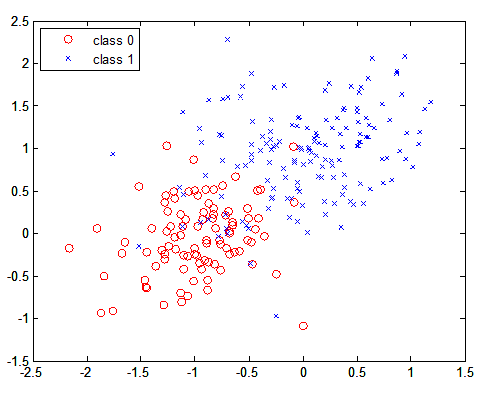

In [1]:
import os
from IPython.display import Image
os.chdir(r'C:\Users\Helio\Documents\ALL THAT MATTERS\PEDS\Machine learning\aula 2')
Image("main-qimg-73565d1f8327d607ce67c2f5761681d0.png")

Para o problema acima poderíamos definir um classificador linear da forma 

$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 = 0$,

que é equivalente a $w'X=0$ em notação matricial, sendo:

$w = \begin{pmatrix} 
w_1 & w_2 & w_3
\end{pmatrix}'$ 

$X = \begin{pmatrix} 
x_1 & x_2 & 0
\end{pmatrix}'$

Dependendo se $w'X<0$ ou $w'X>0$ classificamos uma observação em uma classe ou outra.

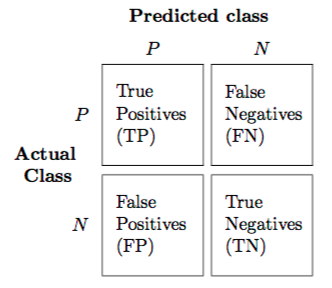

In [2]:
Image("confusion_matrix_1.png")

$Accuracy = \frac{(TP+TN)}{(TP+FN+FP+TN)}$

$Recall = \frac{TP}{TP+FN}$

$False \space Positive \space Rate \space (FPR) = \frac{FP}{TN+FP}$

$Precision = \frac{TP}{TP+FP}$

## ROC

Para cada valor de um parâmetro, plotamos o recall em função da FPR.

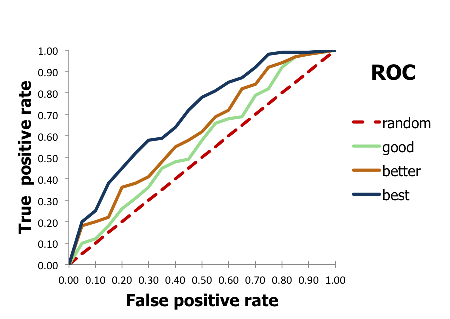

In [4]:
Image(r'roc-theory-small.png')

## Avaliação do Modelo

- Separamos a amostra num conjunto de teste e treinamento, eventualmente, num terceiro grupo de validação
- K-fold cross validation: Dividir a a amostra em K conjuntos e treinar o modelo K vezes, sendo a a amostra de teste cada uma das K divisões da amostra em cada treinamento. Tira-se a média das validações.

## Naive Bayes

- Assume que cada classe segue uma distribuição normal
- Classifica-se para uma classe de acordo com a maior verossimilhança

Sendo $M$ atributos para cada observação:

$p(\mathbf{x}|C_k) = \prod_{j=1}^{M} p(x_j|C_k), k=1,...,L$

$C_m = \underset{C_m}{\operatorname{argmax}} \prod_{j=1}^{M} p(x_j|C_k), k=1,...,L
$

# Aula 03 - Redução de dimensionalidade

## Principal Component Analysis

**Matriz de Covariância (C)**

$C = E[XX']$, sendo $X$ a matriz $k \times n$ cuja entrada $X_{ij}$ representa o valor do atributo $i$ **subtraído da média** daquele atributo com relação à observação/indivíduo $j$.

Logo, o valor esperado de $XX'$ é tal que:

$E[XX'] = \frac{1}{N} \sum_{i=1}^{N}
\begin{pmatrix} 
x_{0i}^2 & x_{0i} x_{1i} & \dots\\
x_{1i}x_{0i} & x_{1i}^2 \\
\vdots & & \ddots
\end{pmatrix}
= \begin{pmatrix}
Var(x_1) & Cov(x_0,x_1) & \dots \\
Cov(x_1, x_0) & Var(x_1) \\
\vdots & & \ddots
\end{pmatrix}$

Por construção, temos que $C$ é simétrica, positiva definida, diagonalizável e com autovalores reais positivos, se nenhuma das variâncias ou covariâncias é nula. Pela simetria, também conseguimos mostrar que os autovetores de $C$ são ortogonais, ou seja, para quaisquer autovalores $\lambda_i \neq \lambda_j$, os autovalores associados $x_i, x_j$ são tal que $x_i'x_j=0$.

**Adendo sobre projeções**

$\large proj_v^x = \frac{v'x}{v'v} \cdot v, \space\space |proj_v^x|=v'x$

Queremos projetar os dados no espaço gerado por $v$ que é o eixo em que os dados projetados apresentam a maior variância pois queremos preservar a maior parte da dispersão dos dados na dimensão original, com a restrição de que $v$ deve ser um vetor unitário.

A variância dos dados na dimensão original é dada por:

$E = \sum |w^2| = \sum v'x \space x'v = v'(\sum x'x) v$

Queremos encontrar o vetor $\hat{v}$ que apresenta a maior variância quando os dados são nela projetados, portanto queremos encontrar $\hat{v}$ de modo a resolver o problema de maximização:

$\hat{v} = \underset{v}{\operatorname{argmax}}E$. Evidentemente, pela regra de derivação vetorial segue que $\hat{v}$ é tal que:

$\frac{\partial E}{\partial v}=0 \rightarrow 2 v_0 \sum x_0^2 + 2v_1 \sum x_0x_1 + \dots = 0$

Entretanto, essa maximização está sujeita à restrição $F$ de $v$ ser um vetor unitário:

$\underset{v}{\operatorname{max}} E \space s.a. \space F =|v| = \sum_i v_i^2=1$. 

Montando o lagrangiano $L$ desse problema de maximização com restrição:

$L = E - \lambda(F-1)$. Segue que:

$\large \frac{\partial L}{\partial v} = \frac{\partial E}{\partial v} - \lambda \frac{\partial F}{\partial v} =0 \rightarrow \frac{\partial E}{\partial v}=\lambda \frac{\partial F}{\partial v}$. Segue:

$2v_0 \sum x_0x_i + 2v_1 \sum x_1x_i+ \dots = \sum_j 2v_j \sum_i x_jx_i = 2\lambda v_i \rightarrow
N \cdot Cv=\lambda v$

Definindo $A \equiv N \cdot C$, temos que a condição de maximização se torna um problema de encontrar autovalores:

$Av=\lambda v$

$\sum_i \begin{pmatrix} 
x_{0i}^2 & x_{0i} x_{1i} & \dots\\
x_{1i}x_{0i} & x_{1i}^2 \\
\vdots & & \ddots
\end{pmatrix} v=\lambda v$

Deste modo, projetando os dados no espaço gerado pelo autovetor normalizado associado ao maior autovalor da matrix $A$ estamos garantindo que estamos preservando a maior parte da dispersão possível. É possível projetar no espaço gerado pelos $k$ autovetores normalizados associados aos $k$ maiores autovetores, de modo que há um tradeoff entre a quantidade de atributos associada a cada observação e a fração da variância explicada na dimensão em que os dados são projetados.

## Discriminante de Fisher

Neste caso, ao contrário do PCA, temos um problema de aprendizado supervisionado, em que se deseja projetar os dados no espaço gerado em que os dados são melhor separáveis. Ou seja, no caso do PCA maximizamos a variância no espaço projetado, no caso de Fisher, maximizamos a separabilidade dos dados.

Para realizar essa maximização, precisamos entender o que são as medidas de espalhamento, que podem ser intraclasse, interclasse e misto.

**Espalhamento Intraclasse:** $S_w=\sum_{i=1}^{M}P_iS_i, \space P_i=\frac{n_i}{N}, \space S_i= E[(x-\mu_i)(x-\mu_i)']$. 

Vemos que $S_i$ representa uma medida de variabilidade, ou seja, o quanto as observações estão distantes da média $\mu_i$, ponderado pelo peso que cada classe representa no todo, $n_i/N$. Se somarmos todos os valores na diagonal dessa matriz temos então a variância média dos atributos da amostra, ou seja, quanto menor é $Tr(S_w)$, menos dispersas e mais coesas são as classes.

**Espalhamento Interclasse:** $S_b=\sum_{i=1}^{M} P_i(\mu_i-\mu_0)(\mu_i-\mu_0)', \space \mu_0=\sum_{i=1}^{M}P_i\mu_i$.

Como $\mu_0$ representa a média dos valores médios de cada classe, se todas as classes forem muito concentradas e com observações muito próximas, $\mu_i$, o valor da média de uma classe específica estará próximo do valor médio das classes em conjunto. Assim, $Tr(S_b)$ mede a distância média das classes em relação ao valor médio de todas as classes em conjunto (centro de massa global).

**Espalhamento Misto:** $S_m=S_w+S_b=E[(x-\mu_0)(x-\mu_0)']$

### Medidas sobre as matrizes de espalhamento

- $ J_1=\large\frac{Tr(S_m)}{Tr(S_w)}$


- $ J_2=|S_w^{-1}S_m|$


- $ J_3=Tr(S_w^{-1}S_m)$

Pode-se notar que quanto maiores são essas medidas, as classes são muito distintas entre si, mas os valores dentro de uma mesma classe são mais concentrados, tudo em termos relativos. Portanto, as classes são mais separáveis conforme esse valor cresce, pois em termos relativos, o espalhamento intragrupo é menor que entre grupos ($Tr(S_w)<Tr(S_b)$).

Para nosso problema de otimização, é bastante intuitivo que queiramos maximizar a razão entre $S_b$ e $S_w$ que, por exemplo, no caso de duas classes:

$\large \frac{|S_b|}{|S_w|}=\frac{(\mu_1 - \mu_2)^2}{\sigma_1^2 + \sigma_2^2}$

Deste modo, ao invés da matriz $A$ a ser maximizada ser a matriz de variância, agora resolveremos o problema de otimização para $S_w^{-1}S_b$, de modo que:

$S_w^{-1}S_bv^{*}=\lambda v^{*}$, que é a condição de optimalidade para o máximo da métrica $J_3$ ao projetar os dados em um vetor $v$, ou seja:

$v^{*} = \underset{v}{\operatorname{argmax}} Tr(S_w^{-1}S_m) $

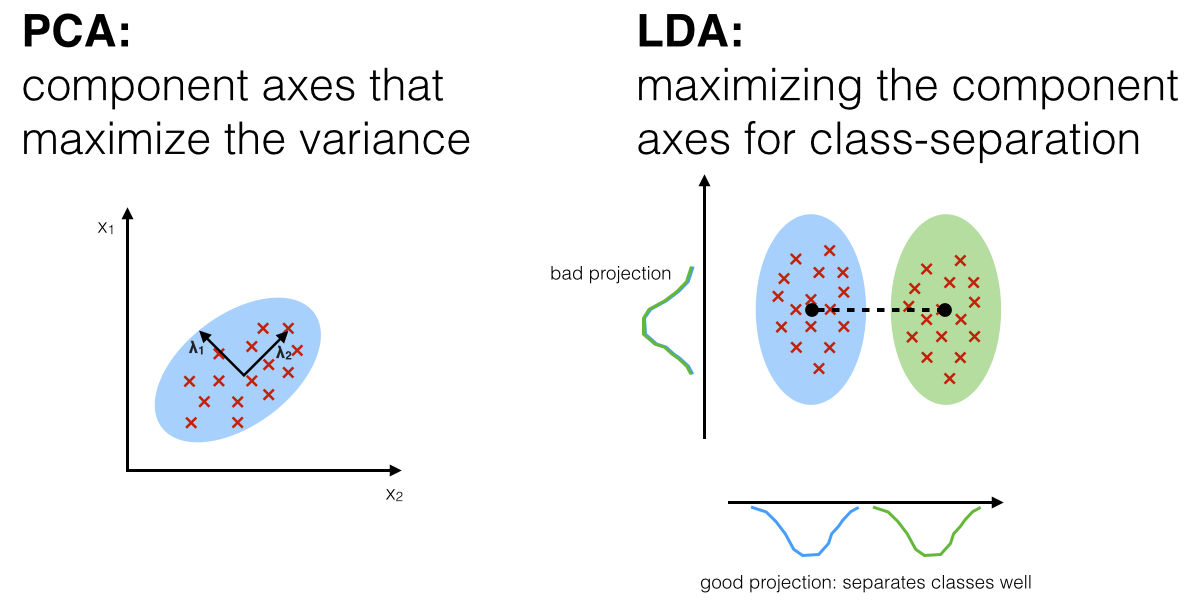

In [6]:
Image(r'C:\Users\Helio\Documents\ALL THAT MATTERS\PEDS\Machine learning\img\lda_1.png')